## Comparing distribution of real part of spectra

In [37]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import pickle
from scipy import stats

### Modifiable settings

In [38]:
nMin, nMax = 2, 8

In [39]:
def cumulative(data) :
    sort = [np.sort(data[i]) for i in range(len(data))]
    CDF = [np.cumsum(np.ones_like(data[i]))/len(data[i]) for i in range(len(data))]

    return sort, CDF

def rescale(data) :
    Min = [abs(min(data[i])) for i in range(len(data))]
    rescaled = [data[i]/Min[i] for i in range(len(data))]
    return rescaled

### Importing data

In [40]:
# importing files
with open('sorted_data/real_May_N2-7.pickle', 'rb') as file:
    realMay = pickle.load(file)

with open('sorted_data/real_1-link_N2-7.pickle', 'rb') as file:
    realEvol2 = pickle.load(file)

with open('sorted_data/real_2-links_N2-7.pickle', 'rb') as file:
    realEvol1 = pickle.load(file)
    
# sorting data    
xMay, yMay = cumulative(realMay)
xEvol1, yEvol1 = cumulative(realEvol1)
xEvol2, yEvol2 = cumulative(realEvol2)

### Kolmogorov–Smirnov test

In [41]:
# rescaling data
printing = False

if printing == True :
    for i in range(nMax-nMin) :
        print(f'Size = {i:2.0f}')
        print(f'Min: {min(xMay[i]):2.2f}, {min(xEvol1[i]):2.2f}, {min(xEvol2[i]):2.2f}')
        print(f'Max: {max(xMay[i]):2.2f}, {max(xEvol1[i]):2.2f}, {max(xEvol2[i]):2.2f}\n')

xMay = rescale(xMay)
xEvol1 = rescale(xEvol1)
xEvol2 = rescale(xEvol2)

if printing == True :
    for i in range(nMax-nMin) :
        print(f'Size = {nMin + i:2.0f}')
        print(f'Min: {min(xMay[i]):2.2f}, {min(xEvol1[i]):2.2f}, {min(xEvol2[i]):2.2f}')
        print(f'Max: {max(xMay[i]):2.2f}, {max(xEvol1[i]):2.2f}, {max(xEvol2[i]):2.2f}\n')

size:  2, p-value: 0.0000000000
size:  3, p-value: 0.0000000000
size:  4, p-value: 0.0000000000
size:  5, p-value: 0.0000000000
size:  6, p-value: 0.0000000000
size:  7, p-value: 0.0000000000


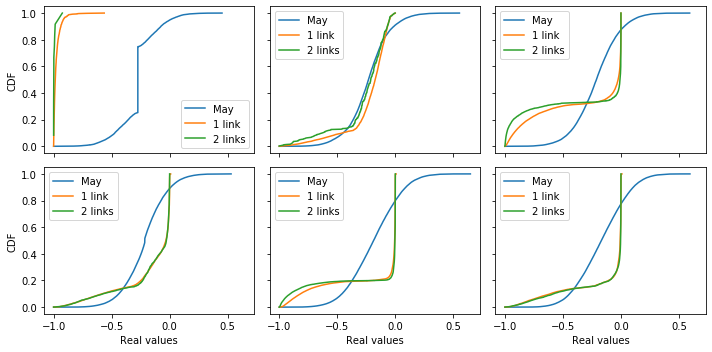

In [44]:
fig, axes = plt.subplots(2,3, figsize=(10,5), sharex=True, sharey=True);
axes[0,0].set(ylabel='CDF')
axes[1,0].set(xlabel='Real values', ylabel='CDF')
axes[1,1].set(xlabel='Real values')
axes[1,2].set(xlabel='Real values')

i = 0
for ax in axes.flat :
    # Kolmogorov-Smirnov
    _, p_ks = stats.ks_2samp(xMay[i], xEvol1[i])
    print(f'size: {nMin+i:2.0f}, p-value: {p_ks:2.10f}')
    
    ax.plot(xMay[i], yMay[i], label='May');
    ax.plot(xEvol1[i], yEvol1[i], label='1 link');
    ax.plot(xEvol2[i], yEvol2[i], label='2 links');
    ax.legend();
    
    i += 1
    
fig.tight_layout();

In [43]:
fig.savefig('figs/CDF_real_eigenvalues.png', dpi=100);

### Potential issues and future tasks
- KS-test only for continuous distributions...
- Adjust to same size.
    - From 1-0? 
    - Cut of May-data?
    - Something wrong with xEvol for size=2
- Add unstable eigenvalues